In [1]:
import pandas as pd
import os
from plotting import *
from utils import *

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Exploring the data</h1></div>

> #### _`This data seems to have 11 files each has 1000 record`_
> #### _`Every file has the following columns:`_
>
>|id | title | date| author |story | topic 
>|----|----|----|----|----|----|
> #### _`We need to merge these files into only 1 dataframe`_
 


In [2]:
path='./dataset/'
filenames = os.listdir(path)
merged_df = pd.DataFrame()

for file in filenames:
    if file.startswith("stories"):
        data = pd.read_csv(path+file,usecols=lambda col: col != 'Unnamed: 0')
        merged_df=pd.concat([data,merged_df])

In [3]:
merged_df.info()
# no need to handle missing values as all are non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11000 non-null  object
 1   title   11000 non-null  object
 2   date    11000 non-null  object
 3   author  11000 non-null  object
 4   story   11000 non-null  object
 5   topic   11000 non-null  object
dtypes: object(6)
memory usage: 601.6+ KB


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Interesting Insights</h1></div>

> #### _`Authors vs the topic `_
>  - `Identify the most prolific authors in terms of the number of published stories.`
> - `who are the fameous authors  (most frequent publishers) of every topic.`


> #### _`Date`_
> - `Analyze the distribution of stories across different months, days of the week, or even hours of the day.`
> - `Identify trends or patterns in the publishing frequency for different topics.`
 
> #### _`Story`_
> - `Story Length Analysis: Compare the lengths of stories for each topic. This can give insights into whether certain topics tend to have longer or shorter stories.`
> - `Word Frequency Analysis: Calculate the word frequency for each topic to identify the most common words associated with each topic.`
> - `Word Clouds: Create word clouds for each topic to visually represent the most frequently occurring words in the stories related to that topic. Word clouds can provide a quick glimpse of the main themes and keywords associated with each topic`
> - `Named Entity Recognition (NER): Use NER to extract and visualize named entities (e.g., names of people, organizations, locations) from the stories for each topic. This can help identify important entities associated with each topic.`

In [4]:
justify_date(merged_df)

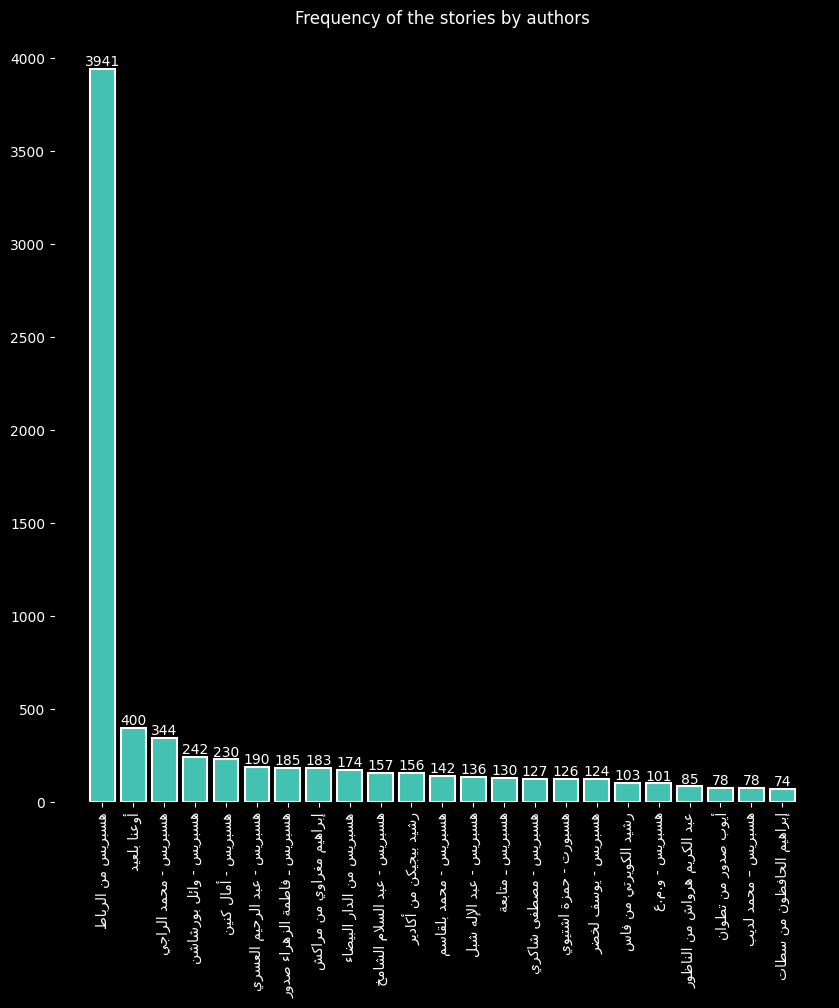

In [5]:
plot_histogram_bycount(merged_df,'author', threshold=70,title="Frequency of the stories by authors")

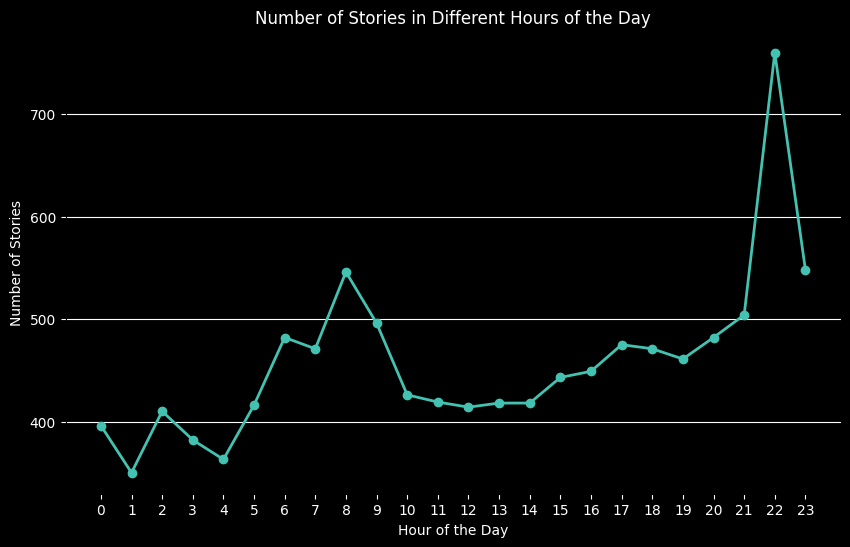

In [6]:
plot_linegraph(merged_df,'hour','Number of Stories in Different Hours of the Day')


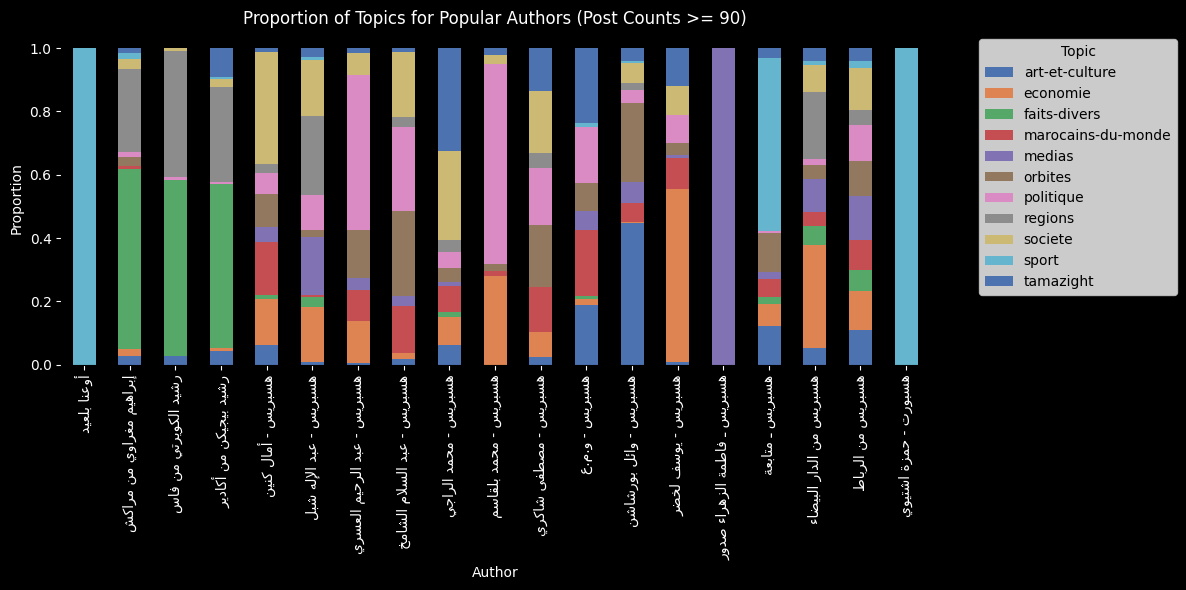

In [7]:
plot_stackedbar(merged_df,"author","topic",90)

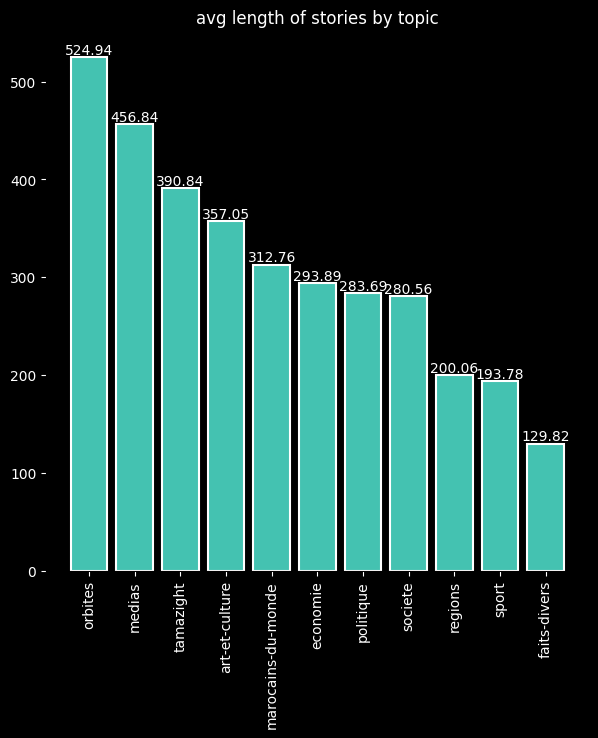

In [8]:
# tokenize , remove punctuation and tashkeel
merged_df['story-processed'] = merged_df['story'].apply(preprocess_arabic_text)
plot_histogram_byavg(merged_df,'topic','story-processed',title='avg length of stories by topic')